In [1]:
#KNN
#https://www.kaggle.com/code/sattu9/knn-on-haberman

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("haberman.csv")

In [4]:
col_names=['age','year','node','status']
df.columns=col_names

In [5]:
df.head()

,age,year,node,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
df.groupby('status').count()

,age,year,node
status,,,
1,224,224,224
2,81,81,81


In [7]:
x=df.drop('status',axis=1)

In [8]:
y=df['status']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
pred= knn.predict(X_test)
pred

C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1], dtype=int64)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(confusion_matrix(y_test,pred))

[[36 12]
 [ 7  6]]


In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.84      0.75      0.79        48
           2       0.33      0.46      0.39        13

    accuracy                           0.69        61
   macro avg       0.59      0.61      0.59        61
weighted avg       0.73      0.69      0.71        61



In [17]:
#calculating error rate for selection proper K value seeing the graph
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

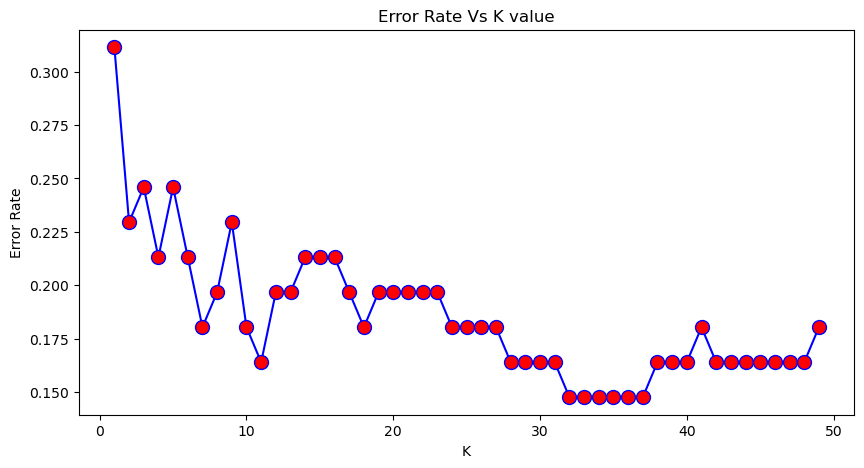

In [18]:
plt.figure(figsize=(10,5))
plt.plot(range(1,50),error_rate,color='blue',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
# from the above plot we can see that for K ~ 11  we are getting low error rates so lets take K=24 
# and train our model again

knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
pred= knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[44  4]
 [ 6  7]]
              precision    recall  f1-score   support

           1       0.88      0.92      0.90        48
           2       0.64      0.54      0.58        13

    accuracy                           0.84        61
   macro avg       0.76      0.73      0.74        61
weighted avg       0.83      0.84      0.83        61



C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [1]:
#naive bayes
#https://www.kaggle.com/code/shinewithsiri/haberman-data-sirisha-gorasa

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
haberman_data=pd.read_csv("haberman.csv")

In [4]:
haberman_data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
haberman_data.columns=["Age","Year","Nodes","Survival_Status"]
haberman_data.head()

,Age,Year,Nodes,Survival_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
print("The number of rows in the dataset are :",len(haberman_data))

The number of rows in the dataset are : 305


In [7]:
haberman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   Year             305 non-null    int64
 2   Nodes            305 non-null    int64
 3   Survival_Status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [8]:
haberman_data.describe()

,Age,Year,Nodes,Survival_Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
haberman_data.isnull().sum()

Age                0
Year               0
Nodes              0
Survival_Status    0
dtype: int64

In [10]:
import seaborn as sb

<AxesSubplot:>

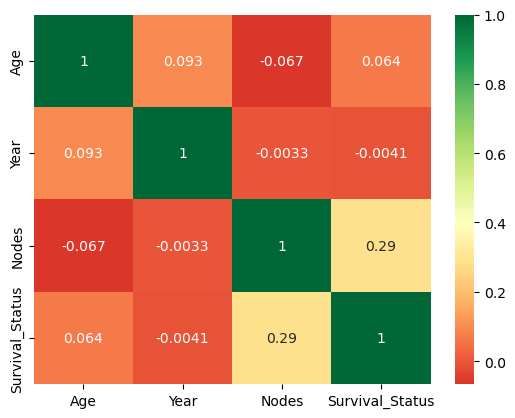

In [11]:
sb.heatmap(haberman_data.corr(), annot=True , cmap="RdYlGn",center=0.4)

<AxesSubplot:>

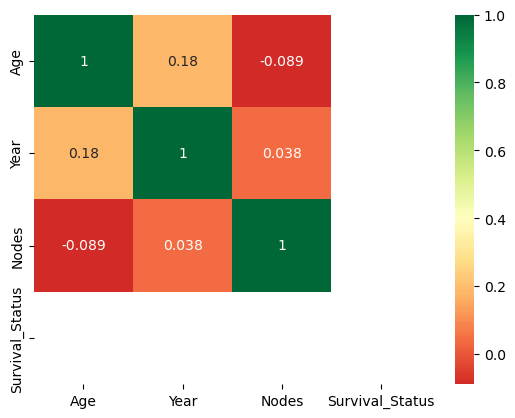

In [12]:
data_survived=haberman_data[haberman_data["Survival_Status"]==1]
sb.heatmap(data_survived.corr(), annot=True , cmap="RdYlGn",center=0.4)

<AxesSubplot:>

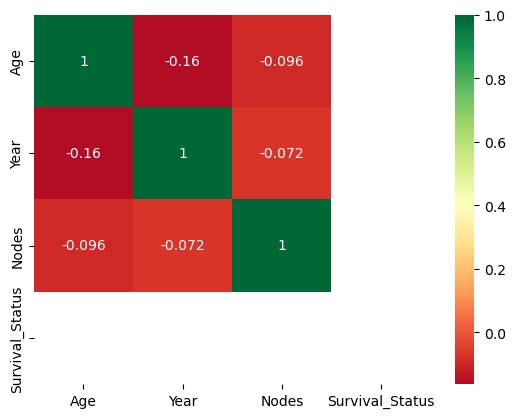

In [13]:
data_not_survived=haberman_data[haberman_data["Survival_Status"]==2]
sb.heatmap(data_not_survived.corr(), annot=True , cmap="RdYlGn",center=0.4)

<AxesSubplot:ylabel='Age'>

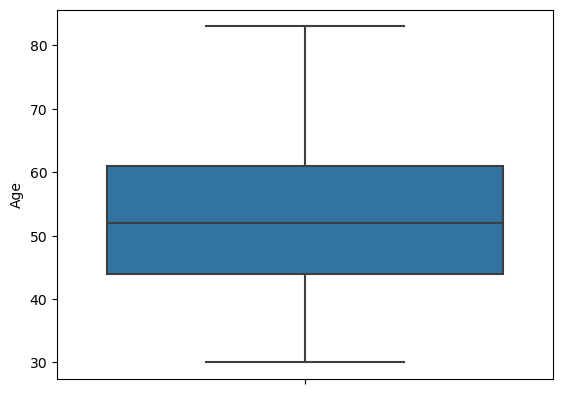

In [14]:
sb.boxplot( y=haberman_data['Age'])

<AxesSubplot:ylabel='Year'>

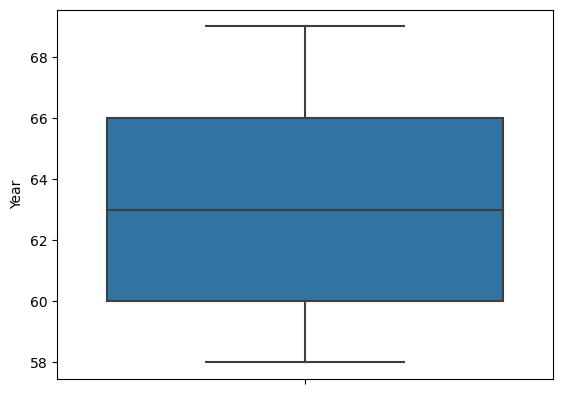

In [15]:
sb.boxplot( y=haberman_data['Year'])

<AxesSubplot:ylabel='Nodes'>

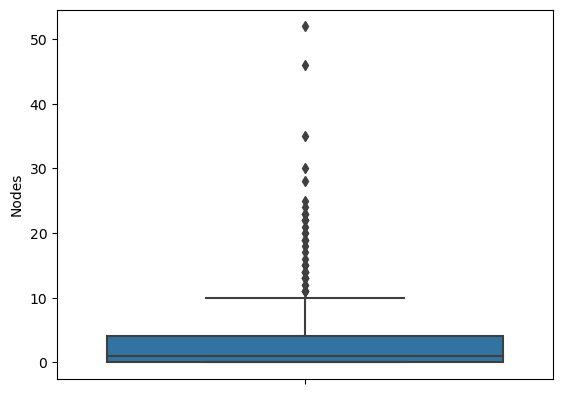

In [16]:
sb.boxplot( y=haberman_data['Nodes'])

<AxesSubplot:ylabel='Survival_Status'>

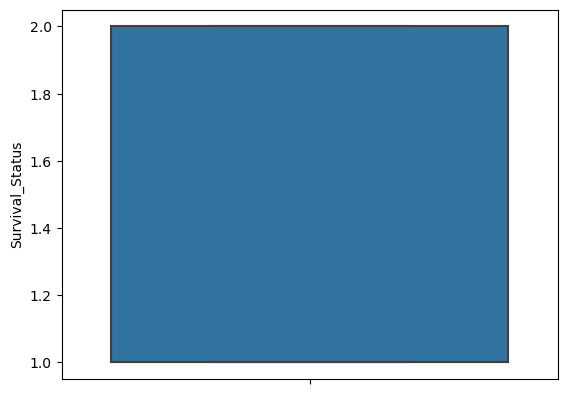

In [17]:
sb.boxplot( y=haberman_data['Survival_Status'])

<AxesSubplot:>

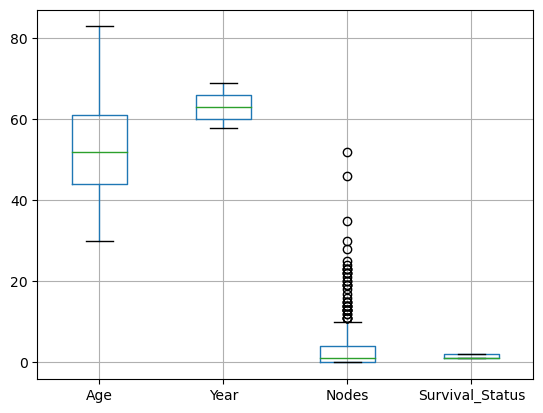

In [18]:
haberman_data.boxplot()

In [19]:
outliers=haberman_data[haberman_data["Nodes"]>10]
print(outliers)
print("The number of outliers in the Attribute : Nodes is :",len(outliers))

     Age  Year  Nodes  Survival_Status
8     34    58     30                1
13    35    64     13                1
21    37    60     15                1
23    38    69     21                2
30    38    66     11                1
42    41    60     23                2
58    42    62     20                1
61    43    58     52                2
65    43    63     14                1
74    44    63     19                2
78    44    67     16                1
84    45    59     14                1
91    46    65     20                2
95    47    63     23                2
105   47    66     12                1
106   48    58     11                2
107   48    58     11                2
123   50    63     13                2
135   51    59     13                2
159   53    63     24                2
160   53    65     12                2
166   54    60     11                2
167   54    65     23                2
173   54    67     46                1
176   54    63     19    

In [20]:
train_data=haberman_data[haberman_data["Nodes"]<=10]
from sklearn.model_selection import train_test_split

In [21]:
class_label=train_data["Survival_Status"]
train_data.drop(["Survival_Status"],axis=1,inplace=True)
train_data

C:\Users\FAHAD\AppData\Local\Temp\ipykernel_15504\3196517372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(["Survival_Status"],axis=1,inplace=True)


,Age,Year,Nodes
0,30,62,3
1,30,65,0
2,31,59,2
3,31,65,4
4,33,58,10
...,...,...,...
300,75,62,1
301,76,67,0
302,77,65,3
303,78,65,1


In [22]:
X_train,X_test,y_train,y_test=train_test_split(train_data,class_label)
X_test

,Age,Year,Nodes
126,50,61,6
303,78,65,1
188,55,67,1
208,58,60,3
279,68,68,0
...,...,...,...
227,60,64,0
69,43,63,2
100,47,66,0
298,74,65,3


In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X_train,y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
pred = model.predict(X_test)
print(classification_report(pred,y_test))
print("The accuracy in the case of Naive Bayes using Gaussian Naive Bayes Classifier is:",accuracy_score(pred,y_test)*100)

              precision    recall  f1-score   support

           1       0.86      0.91      0.88        54
           2       0.50      0.38      0.43        13

    accuracy                           0.81        67
   macro avg       0.68      0.65      0.66        67
weighted avg       0.79      0.81      0.80        67

The accuracy in the case of Naive Bayes using Gaussian Naive Bayes Classifier is: 80.59701492537313


In [24]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train,y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
pred = model.predict(X_test)
print(classification_report(pred,y_test))
print("The accuracy in the case of Naive Bayes using Multinomial Naive Bayes Classifier is:",accuracy_score(pred,y_test)*100)

              precision    recall  f1-score   support

           1       0.81      0.90      0.85        51
           2       0.50      0.31      0.38        16

    accuracy                           0.76        67
   macro avg       0.65      0.61      0.62        67
weighted avg       0.73      0.76      0.74        67

The accuracy in the case of Naive Bayes using Multinomial Naive Bayes Classifier is: 76.11940298507463


In [25]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train,y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
pred = model.predict(X_test)
print(classification_report(pred,y_test))
acc1=accuracy_score(pred,y_test)*100
print("The accuracy in the case of Naive Bayes using Bernoulli Naive Bayes Classifier is:",acc1)

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        67
           2       0.00      0.00      0.00         0

    accuracy                           0.85        67
   macro avg       0.50      0.43      0.46        67
weighted avg       1.00      0.85      0.92        67

The accuracy in the case of Naive Bayes using Bernoulli Naive Bayes Classifier is: 85.07462686567165


C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train)
pred2 = model.predict(X_test)
acc2=accuracy_score(pred2,y_test)*100
print("The accuracy for Logistic Regression Model is:",acc2)
print(classification_report(pred,y_test))


The accuracy for Logistic Regression Model is: 83.5820895522388
              precision    recall  f1-score   support

           1       1.00      0.85      0.92        67
           2       0.00      0.00      0.00         0

    accuracy                           0.85        67
   macro avg       0.50      0.43      0.46        67
weighted avg       1.00      0.85      0.92        67



C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
acc3=accuracy_score(pred,y_test)*100
print("The accuracy for KNN Model is:",acc3)
print(classification_report(pred,y_test))

The accuracy for KNN Model is: 73.13432835820896
              precision    recall  f1-score   support

           1       0.86      0.83      0.84        59
           2       0.00      0.00      0.00         8

    accuracy                           0.73        67
   macro avg       0.43      0.42      0.42        67
weighted avg       0.76      0.73      0.74        67



C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
from sklearn.svm import SVC
model = SVC().fit(X_train,y_train)
pred = model.predict(X_test)
acc4=accuracy_score(pred,y_test)*100
print("The accuracy for Support Vector Classifier model is :",acc4)
print(classification_report(pred,y_test))

The accuracy for Support Vector Classifier model is : 85.07462686567165
              precision    recall  f1-score   support

           1       1.00      0.85      0.92        67
           2       0.00      0.00      0.00         0

    accuracy                           0.85        67
   macro avg       0.50      0.43      0.46        67
weighted avg       1.00      0.85      0.92        67



C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train,y_train)
pred = model.predict(X_test)
acc5=accuracy_score(pred,y_test)*100
print("The accuracy for Decision Tree Classifier model is:",acc5)
print(classification_report(pred,y_test))

The accuracy for Decision Tree Classifier model is: 68.65671641791045
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        50
           2       0.30      0.18      0.22        17

    accuracy                           0.69        67
   macro avg       0.53      0.52      0.51        67
weighted avg       0.64      0.69      0.66        67



In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_train,y_train)
pred = model.predict(X_test)
acc6=accuracy_score(pred,y_test)*100
print("The accuracy for Random Forest Classifier Model is:",acc6)
print(classification_report(pred,y_test)) 

The accuracy for Random Forest Classifier Model is: 77.61194029850746
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        60
           2       0.10      0.14      0.12         7

    accuracy                           0.78        67
   macro avg       0.50      0.50      0.49        67
weighted avg       0.81      0.78      0.79        67



In [34]:
models = []
models.append(('NB', BernoulliNB()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

NB: 0.757632 (0.098433)
LR: 0.737632 (0.078066)
KNN: 0.722895 (0.094239)
SVM: 0.757632 (0.098433)
CART: 0.667105 (0.082635)


C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

RFC: 0.672105 (0.069875)


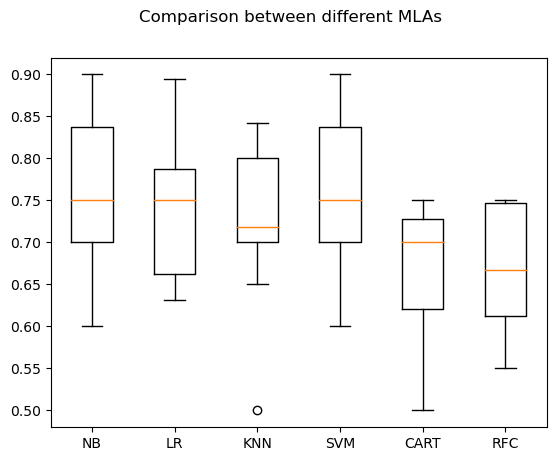

In [36]:
# evaluate each model in turn
import random
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=random.seed())
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
MLA = [
    linear_model.LogisticRegressionCV(),
    ensemble.RandomForestClassifier(),
    svm.SVC(probability=True),
    tree.DecisionTreeClassifier(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    naive_bayes.MultinomialNB(),
    neighbors.KNeighborsClassifier(),
    ]

In [38]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Algorithm used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,Algorithm used,Train Accuracy,Test Accuracy,Precision,Recall
0,LogisticRegressionCV,0.7576,0.8507,0.850746,1.000000
2,SVC,0.7576,0.8507,0.850746,1.000000
4,BernoulliNB,0.7576,0.8507,0.850746,1.000000
5,GaussianNB,0.7424,0.8060,0.907407,0.859649
6,MultinomialNB,0.7323,0.7612,0.901961,0.807018
1,RandomForestClassifier,0.9747,0.7463,0.844828,0.859649
3,DecisionTreeClassifier,0.9747,0.7164,0.865385,0.789474
7,KNeighborsClassifier,0.7879,0.7164,0.827586,0.842105


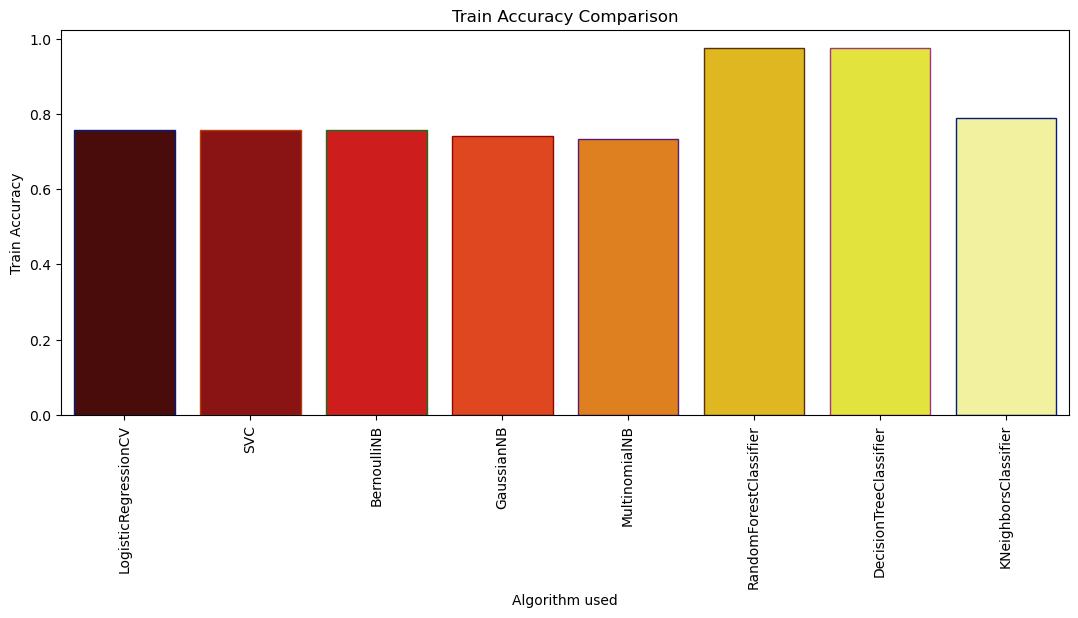

In [39]:
plt.subplots(figsize=(13,5))
sb.barplot(x="Algorithm used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sb.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Train Accuracy Comparison')
plt.show()

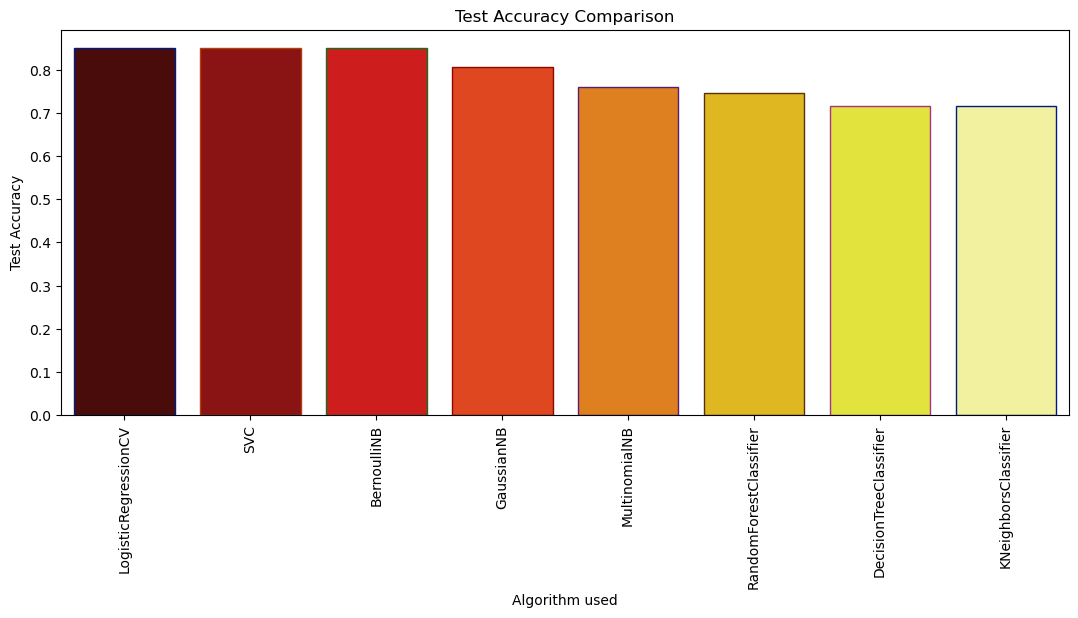

In [40]:
plt.subplots(figsize=(13,5))
sb.barplot(x="Algorithm used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sb.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Test Accuracy Comparison')
plt.show()

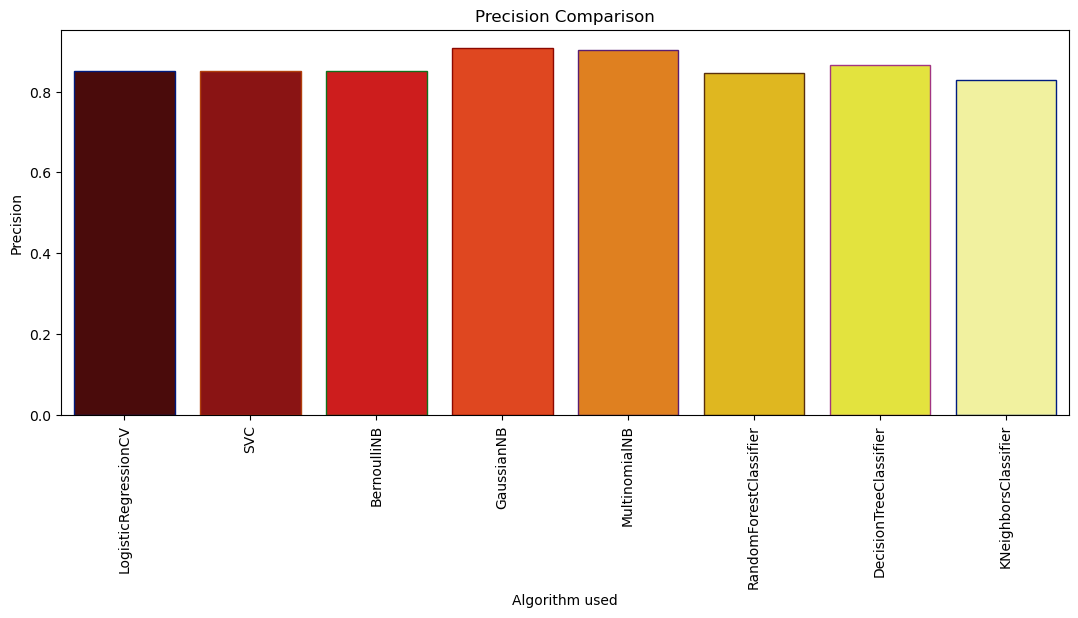

In [41]:
plt.subplots(figsize=(13,5))
sb.barplot(x="Algorithm used", y="Precision",data=MLA_compare,palette='hot',edgecolor=sb.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Precision Comparison')
plt.show()

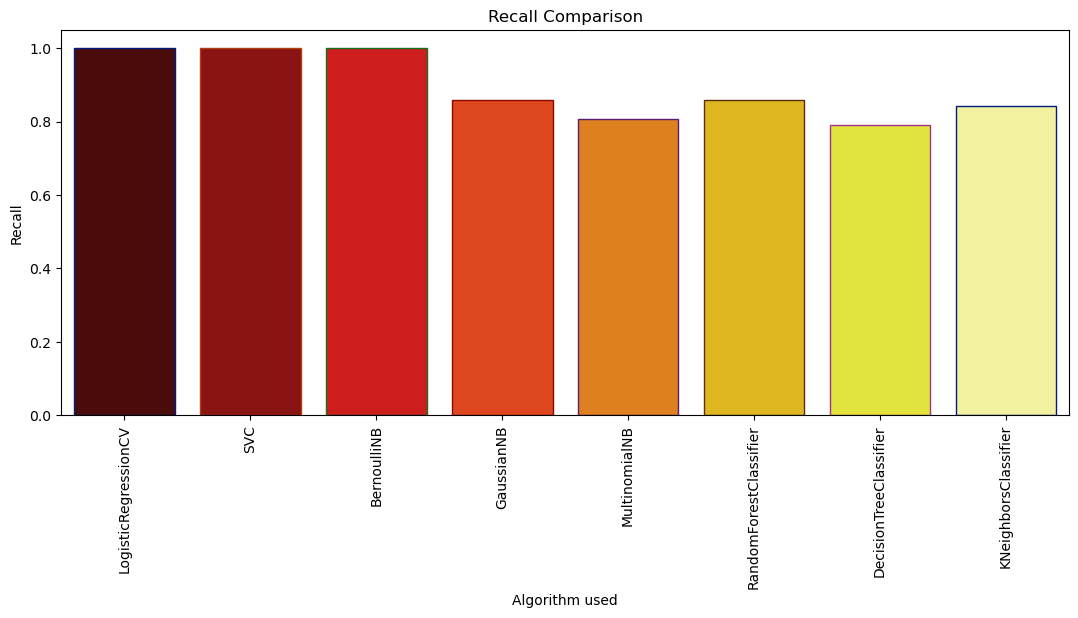

In [42]:
plt.subplots(figsize=(13,5))
sb.barplot(x="Algorithm used", y="Recall",data=MLA_compare,palette='hot',edgecolor=sb.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Recall Comparison')
plt.show()

In [45]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [46]:
from prettytable import PrettyTable
x = PrettyTable()

In [47]:
x.field_names = ["Machine Learning Algorithm", "Accuracy"]
x.add_row(["Naive Bayes Classification",acc1])
x.add_row(["Logistic Regression",acc2])
x.add_row(["K-Nearest Neighbor",acc3])
x.add_row(["Support Vector Machines",acc4])
x.add_row(["Decision Tree",acc5])
x.add_row(["Random Forest",acc6])

In [48]:
print(x)

+----------------------------+-------------------+
| Machine Learning Algorithm |      Accuracy     |
+----------------------------+-------------------+
| Naive Bayes Classification | 85.07462686567165 |
|    Logistic Regression     |  83.5820895522388 |
|     K-Nearest Neighbor     | 73.13432835820896 |
|  Support Vector Machines   | 85.07462686567165 |
|       Decision Tree        | 68.65671641791045 |
|       Random Forest        | 77.61194029850746 |
+----------------------------+-------------------+
